In [10]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
# from __future__ import unicode_literals
import numpy as np
from PIL import Image
import time
import argparse
import pyflow
import fnmatch
import os
import matplotlib.pyplot as plt
import cv2

    
# Flow Options:
alpha = 0.012
ratio = 0.75
minWidth = 20
nOuterFPIterations = 7
nInnerFPIterations = 1
nSORIterations = 30
colType = 1  # 0 or default:RGB, 1:GRAY (but pass gray image with shape (h,w,1))
#---------------------------------------------------------------------------------------
path = '/usr/not-backed-up/1_DATABASE/UCSD_Anomaly_Dataset.tar/UCSD_Anomaly_Dataset.v1p2/'
data = 'UCSDped1/'
subset = 'Train/'
savePath = path + 'Flow_python_240x360' + subset

if not os.path.exists(savePath):
    os.mkdir(savePath)
cur_fold = path + data + subset

for seq in range(1):
    id = 0
    print(seq)
    if seq < 9:                
        dirpath = cur_fold + 'Train00' + str(seq+1)
    else:
        dirpath = cur_fold + 'Train0' + str(seq+1)  
    nfr = len(fnmatch.filter(os.listdir(dirpath), '*.tif'))
    flow_seq = np.zeros((156,240,2,nfr),dtype=np.float64)
    for fr in range(nfr-1):
        if fr < 8:
            first = '00' + str(fr+1)
            second = '00' + str(fr+2)
        elif fr == 8:
            first = '00' + str(fr+1)
            second = '0' + str(fr+2)
        elif fr < 98:
            first = '0' + str(fr+1)
            second = '0' + str(fr+2)
        elif fr == 98:
            first = '0' + str(fr+1)
            second = str(fr+2)
        else:
            first = str(fr+1)
            second = str(fr+2)
        im1 = Image.open(dirpath + '/' + first + '.tif')
        im1 = np.array(im1.resize((240,156),Image.BILINEAR))#size [width,height]            
        im1 = np.reshape(im1,[156,240,1])
        
#         im1 = np.concatenate((im1[..., None],im1[..., None],im1[..., None]),axis=2)
        im2 = Image.open(dirpath + '/' + second + '.tif')
        im2 = np.array(im2.resize((240,156),Image.BILINEAR))       
        im2 = np.reshape(im2,[156,240,1])
#         im2 = np.concatenate((im2[..., None],im2[..., None],im2[..., None]),axis=2)        
        im1 = im1.astype(float) / 255.
        im2 = im2.astype(float) / 255.
        
        
        # s = time.time()
        u, v, im2W = pyflow.coarse2fine_flow(
            im1, im2, alpha, ratio, minWidth, nOuterFPIterations, nInnerFPIterations,
            nSORIterations, colType)
        s = im1.shape
        flow = np.zeros((s[0],s[1],2))
        flow[:,:,0] = u
        flow[:,:,1] = v
        id = id + 1
        flow_seq[:,:,:,id] = flow
#         print(flow_seq.shape)
    np.save(savePath + 'Train' + str(seq+1) + '.npy', flow_seq)
#     np.load(savePath + 'Train' + str(seq+1) + '.npy')

#     print(flow.shape)    
#     print(flow.dtype)
# #         flow = np.concatenate((u[..., None], v[..., None]), axis=2)
# #         print(flow.shape)
        
# #         hsv = np.zeros(im1.shape, dtype=np.uint8)
#         hsv = np.zeros([156,240,3], dtype=np.uint8)
#         hsv[:, :, 0] = 255
#         hsv[:, :, 1] = 255
#         mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
#         hsv[..., 0] = ang * 180 / np.pi / 2
#         hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
#         rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
# #         print(np.shape(rgb))
# #         print(rgb[239,155,:])
#         plt.figure()
# #         plt.axis('off')
#         plt.imshow(rgb)
#         plt.show()
#         raw_input("Press Enter to continue...")

0


KeyboardInterrupt: 

In [11]:
# e = time.time()
        # print('Time Taken: %.2f seconds for image of size (%d, %d, %d)' % (
        #     e - s, im1.shape[0], im1.shape[1], im1.shape[2]))

        
#         flow_seq = np.concatenate
#     np.save(savePath + 'Train' + str(seq+1) + str(id) + '.npy', flow)
        
#         import matplotlib.pyplot as plt
#         import cv2
a = flow_seq[:,:,:,200]
hsv = np.zeros([156,240,3], dtype=np.uint8)
hsv[:, :, 0] = 255
hsv[:, :, 1] = 255
mag, ang = cv2.cartToPolar(a[..., 0], a[..., 1])
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.figure()
plt.axis('off')
plt.imshow(rgb)
plt.show()
# raw_input("Press Enter to continue...")
# print(len(fnmatch.filter(os.listdir(dirpath), '*.tif')))

IndexError: index 200 is out of bounds for axis 3 with size 200

(156, 240)


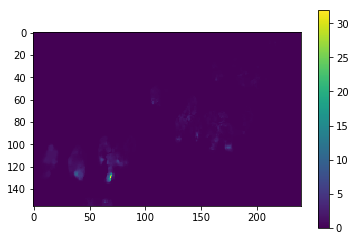

In [12]:
# import sys
# sys.path.insert(0,'/home/csunix/linux/apps/install/anaconda/4.4.0/lib/python2.7/site-packages/scipy/signal/')
# # from scipy.signal import convolve2d
# import scipy.signal.convolve2d
from scipy import signal
a_mag = np.sum(a**2,axis=2)
print(a_mag.shape)
plt.figure()
plt.imshow(a_mag)
plt.colorbar()
plt.show()

In [7]:
w = np.ones([48,48])
b = signal.convolve2d(a_mag, w, boundary='symm', mode='valid')
print(b.shape)
# for i in range(0,10,2):
#     for j in range(0,240,)


(109, 193)
